In [2]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from numpy import linalg as LA
from sklearn.naive_bayes import GaussianNB
from math import pi
from math import sqrt
from math import exp



In [3]:
#-------------------------------------------------------------------------------
#inicjalizacja
#-------------------------------------------------------------------------------

S = np.array([[4, 0],[0, 4]]) #macierz kowariancji do losowania klas

m1 = np.array([-3,3]) #średnie do losowania klas
m2 = np.array([2,2])

n1=40 # ilości obiektów w każdej klasie
n2=30

C1 = np.random.multivariate_normal(m1, S, n1) #macierze klas
C2 = np.random.multivariate_normal(m2, S, n2)

C = np.concatenate((C1,C2)) #macierz wszystkich punktów razem (potrzebna potem)                 
whichC = np.ones(n1+n2) #macierz numerów klas (czyli o której klasy należy dany punkt z macierzy C)
whichC[n1:] = 2

#siatka do namalowania krzywej klasyfikatora:
xRange = (-10,8)
yRange = (-3,9)
xMesh, yMesh = np.meshgrid(np.linspace(xRange[0], xRange[1], 19), np.linspace(yRange[0], yRange[1], 13)) #pomocnicze macierze do siatki
Mesh = np.c_[xMesh.ravel(), yMesh.ravel()] #macierz siatki (wymiar xMesh.shape*yMesh.shape na 2)

In [4]:
#-------------------------------------------------------------------------------
#klasyfikator "z palca"
#-------------------------------------------------------------------------------

def GaussianProbability(x, mean, stdev): #liczy prawdopodobieństwo gaussowskie
	return (1 / (sqrt(2 * pi) * stdev)) * exp(-((x-mean)**2 / (2 * stdev**2 )))

mean1 = sum(C1)/n1 #średnie z klasy
mean2 = sum(C2)/n2

var1 = np.std(C1, axis = 0) #wariancje z klasy
var2 = np.std(C2, axis = 0)
apriori1 = n1/(n1+n2) #prawdop. apriori klas
apriori2 = n2/(n1+n2)


probC1 = np.zeros(Mesh[:,0].size)#pradwopodobieństwo że punkt będzie w klasie 
probC2 = np.zeros(Mesh[:,0].size)

tmp1 = np.ones(Mesh[:,0].size)#pomocnicze
tmp2 = np.ones(Mesh[:,0].size)

for x in range(Mesh[:,0].size):
    probC1[x] = apriori1 * GaussianProbability(Mesh[x][0], mean1[0], var1[0]) * GaussianProbability(Mesh[x][1], mean1[1], var1[1])
    probC2[x] = apriori2 * GaussianProbability(Mesh[x][0], mean2[0], var2[0]) * GaussianProbability(Mesh[x][1], mean2[1], var2[1])

tmp1 = probC1/(probC1 + probC2)
tmp2 = tmp2 - tmp1
probManual = np.vstack((tmp1, tmp2)).T #macierz prawdopodoieństwa zaklasyfikowania każdego elementu siatki (kolumna 0- do klasy 1, 1- do klasy 2)   
probManual = probManual[:, 1].reshape(xMesh.shape) #reshape aby dopasować do wymiaru xMesh na yMesh




In [7]:
#-------------------------------------------------------------------------------
# Funkcja wbudowana
#-------------------------------------------------------------------------------
classifier = GaussianNB()
classifier.fit(C,whichC) #klasyfikujemy dane
probFun = classifier.predict_proba(Mesh) #liczy prawdopodobieństwo dla każdego elementu siatki (0 kolumna - że nalezy do klasy 1, 1 - że do klasy 2)
probFun = probFun[:, 1].reshape(xMesh.shape) #reshape aby dopasować do wymiaru xMesh na yMesh


(247, 2)
(13, 19)


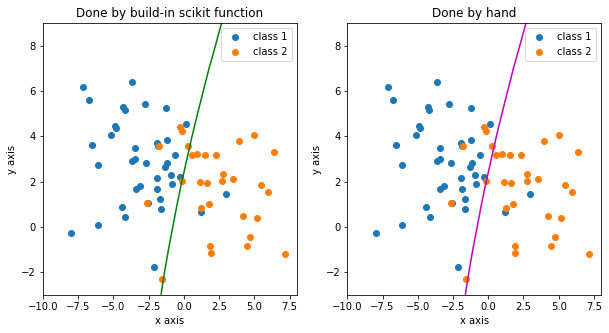

In [8]:
#-------------------------------------------------------------------------------
#wizualka
#-------------------------------------------------------------------------------

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2 ,1 ) #pozycja wykresu na figurze (coś jak rootowe pady na canvasie)
ax1.scatter(C1[:, 0], C1[:, 1], label='class 1', c='#1f77b4') #seria 1
ax1.scatter(C2[:, 0], C2[:, 1], label='class 2', c='#ff7f0e') #seria 2
ax1.title.set_text("Done by build-in scikit function")
ax1.set_xlabel("x axis")
ax1.set_ylabel("y axis")
separationLine1 = ax1.contour(xMesh, yMesh, probFun, [0.5], colors='g') #krzywa z funkcji, malowana tam gdzie prawdop. przynależności jest 50% (stąd to [0.5])
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2) 
ax2.scatter(C1[:, 0], C1[:, 1],label='class 1', c='#1f77b4') 
ax2.scatter(C2[:, 0], C2[:, 1],label='class 2', c='#ff7f0e')
ax2.title.set_text("Done by hand")
ax2.set_xlabel("x axis")
ax2.set_ylabel("y axis")
separationLine2 = ax2.contour(xMesh, yMesh, probManual , [0.5], colors='m')
ax2.legend()

plt.show()

#pytanie na przyszłość: jak dodać contour do legendy? Znalazłem tylko jak zrobić aby był koło niego napis
